In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
data = pd.read_csv('spam_ham_dataset.csv', encoding='latin-1')
data.head(n=10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [79]:
data.size

20684

In [80]:
print(data)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

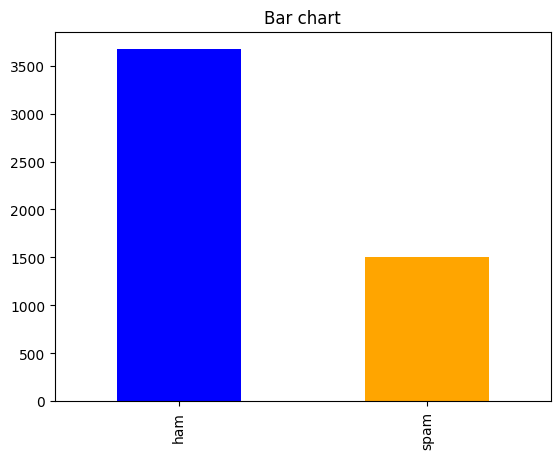

In [81]:
count_Class=pd.value_counts(data["label"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

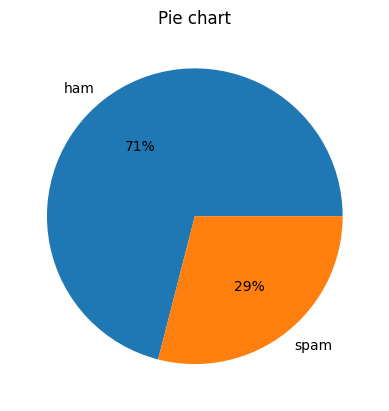

In [82]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [83]:
datanew = data.iloc[:, 2:4] # taking only last 2 columns

In [84]:
datanew

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [85]:
count1 = Counter(" ".join(data[data['label']=='ham']["text"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['label']=='spam']["text"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

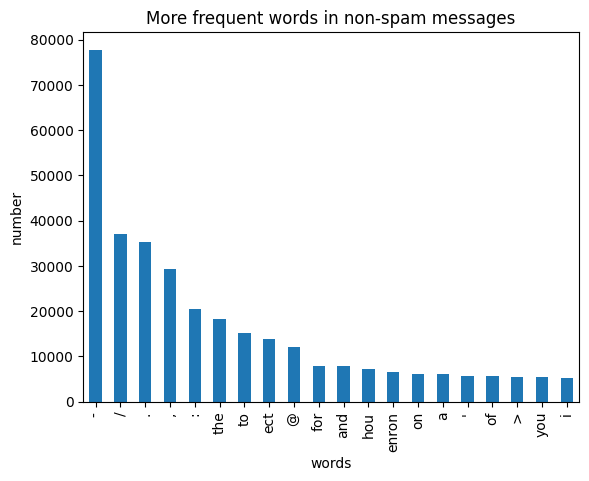

In [86]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"]) #set the tick locations on x axis
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

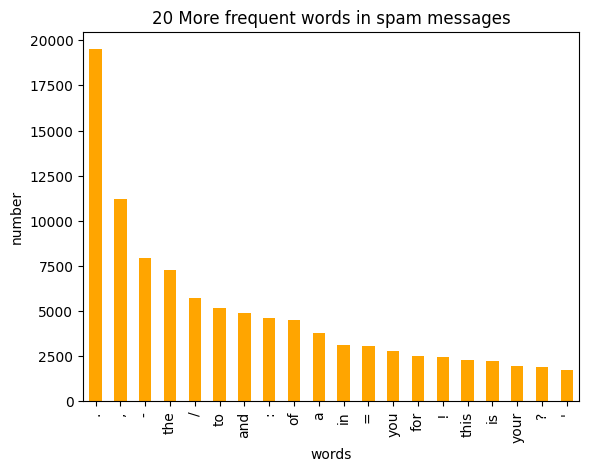

In [87]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('20 More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

removed the stop words in order to improve the analytics

In [88]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["text"])
np.shape(X)

(5171, 50140)

In [89]:
X

<5171x50140 sparse matrix of type '<class 'numpy.int64'>'
	with 338392 stored elements in Compressed Sparse Row format>

In [90]:
#transform the variable spam/non-spam into binary variable
data["label"]=data["label"].map({'spam':1,'ham':0})

In [91]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['label'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3464, 50140), (1707, 50140)]


In [92]:
print([np.shape(y_train), np.shape(y_test)])

[(3464,), (1707,)]


In [93]:
y_train

801     0
1288    0
1558    0
2407    0
4675    0
       ..
4426    0
466     0
3092    1
3772    0
860     0
Name: label, Length: 3464, dtype: int64

In [94]:
X_train

<3464x50140 sparse matrix of type '<class 'numpy.int64'>'
	with 229461 stored elements in Compressed Sparse Row format>

##Multinomial naive bayes classifier
training different bayes models by changing the regularization parameter  α

In [113]:
list_alpha = np.arange(1/100000, 20, 0.11) # created evenly spaced array with start, stop and step
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha) # here alpha determines the distribution in bayesian statistics
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1

In [114]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
#Creation of df table from data values
models = pd.DataFrame(data = matrix, columns =
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.992783,0.980668,0.973970,0.955319
1,0.11001,0.991051,0.976567,0.971800,0.943158
2,0.22001,0.991051,0.977153,0.971800,0.945148
3,0.33001,0.990185,0.976567,0.969631,0.945032
4,0.44001,0.989319,0.975395,0.967462,0.942918
5,0.55001,0.989030,0.975981,0.967462,0.944915
6,0.66001,0.988453,0.976567,0.967462,0.946921
7,0.77001,0.988164,0.977153,0.967462,0.948936
8,0.88001,0.987587,0.977153,0.967462,0.948936
9,0.99001,0.987009,0.976567,0.965293,0.948827


In [115]:
list_alpha.size

182

In [116]:
best_index = models['Test Precision'].idxmax() # selecting the model with highest test precision
models.iloc[best_index, :]

alpha             13.420010
Train Accuracy     0.950924
Test Accuracy      0.942004
Test Recall        0.791757
Test Precision     0.991848
Name: 122, dtype: float64

In [117]:
models[models['Test Precision']>=0.99].head(n=5) # checking how many model highest precision.99

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
67,7.37001,0.967379,0.962507,0.869848,0.990123
68,7.48001,0.967090,0.961336,0.865510,0.990074
69,7.59001,0.967090,0.961336,0.865510,0.990074
70,7.70001,0.966801,0.960164,0.861171,0.990025
122,13.42001,0.950924,0.942004,0.791757,0.991848


It shows that model is producing 1% false positive ,
which is imp in spam classifier,
that is it has less chance of considering non-spam as spam

In [118]:
# Selecting the model which has more test accuracy among the top models with highest possible precision
best_index = models[models['Test Precision']>=0.99]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             7.370010
Train Accuracy    0.967379
Test Accuracy     0.962507
Test Recall       0.869848
Test Precision    0.990123
Name: 67, dtype: float64

In [101]:
# plotting Confusion matrix with selected naive bayes classifier in tabular form
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1242,4
Actual 1,60,401


### Classification using Support Vector Machine

In [102]:
# generating alpha values array from 500 to 2000 in step of 100
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
# training the svm model wih multiple alpha values
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1

In [103]:
list_C

array([ 500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400, 1500,
       1600, 1700, 1800, 1900])

In [104]:
# create table uisng pandas from values stored in arrays
matrix1 = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix1, columns =
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head

<bound method NDFrame.head of          C  Train Accuracy  Test Accuracy  Test Recall  Test Precision
0    500.0             1.0       0.964851     0.960954        0.913402
1    600.0             1.0       0.964851     0.960954        0.913402
2    700.0             1.0       0.964851     0.960954        0.913402
3    800.0             1.0       0.964851     0.960954        0.913402
4    900.0             1.0       0.964851     0.960954        0.913402
5   1000.0             1.0       0.964851     0.960954        0.913402
6   1100.0             1.0       0.964851     0.960954        0.913402
7   1200.0             1.0       0.964851     0.960954        0.913402
8   1300.0             1.0       0.964851     0.960954        0.913402
9   1400.0             1.0       0.964851     0.960954        0.913402
10  1500.0             1.0       0.964851     0.960954        0.913402
11  1600.0             1.0       0.964851     0.960954        0.913402
12  1700.0             1.0       0.964851     0

In [105]:
recall_test

array([0.96095445, 0.96095445, 0.96095445, 0.96095445, 0.96095445,
       0.96095445, 0.96095445, 0.96095445, 0.96095445, 0.96095445,
       0.96095445, 0.96095445, 0.96095445, 0.96095445, 0.96095445])

In [106]:
#select the model with highest test precision
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.964851
Test Recall         0.960954
Test Precision      0.913402
Name: 0, dtype: float64

In [107]:
# finding the no of models with highrest test precision
models[models['Test Precision']>=0.913].head(n=5)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.964851,0.960954,0.913402
1,600.0,1.0,0.964851,0.960954,0.913402
2,700.0,1.0,0.964851,0.960954,0.913402
3,800.0,1.0,0.964851,0.960954,0.913402
4,900.0,1.0,0.964851,0.960954,0.913402


In [108]:
# selecting model with highest test precision and accuracy
best_index = models[models['Test Precision']>=0.913]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.964851
Test Recall         0.960954
Test Precision      0.913402
Name: 0, dtype: float64

In [109]:
#confusion matrix of SVM
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1204,42
Actual 1,18,443


Here we found 42 false positive and 18 false negative
For this datset naive bayes performed better as compared to SVM.

In [110]:
svc.fit(X_train, y_train)

SVC(C=500)

In [111]:
svc = svm.SVC(C=500)
svc.fit(X_train, y_train)

SVC(C=500)

In [112]:
svc.n_iter_

array([1964], dtype=int32)